In [1]:
import torch
import matplotlib.pyplot as plt
from fastai.vision.all import *
from torch.utils.data import DataLoader

In [2]:
path = untar_data(URLs.MNIST_SAMPLE)

In [3]:
Path.BASE_PATH = path
path.ls()

(#3) [Path('train'),Path('labels.csv'),Path('valid')]

In [4]:
three_trained = torch.stack([tensor(Image.open(o)) for o in (path/'train'/'3').ls()])/255.
seven_trained = torch.stack([tensor(Image.open(o)) for o in (path/'train'/'7').ls()])/255.
three_valid = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'3').ls()])/255.
seven_valid = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'7').ls()])/255.

In [5]:
X_train = torch.cat([three_trained, seven_trained]).reshape(-1, 28*28)
y_train = tensor([1]*len(three_trained) + [0]*len(seven_trained)).reshape(-1, 1)

train_dset = list(zip(X_train, y_train))

X_valid = torch.cat([three_valid, seven_valid]).reshape(-1, 28*28)
y_valid = tensor([1]*len(three_valid) + [0]*len(seven_valid)).reshape(-1, 1)

valid_dset = list(zip(X_valid, y_valid))

In [6]:
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()

weights = init_params((28*28, 1))
bias = init_params(1)

In [7]:
def linear1(xb): return xb@weights + bias

In [8]:
def mnist_loss(pred, targ):
    pred = pred.sigmoid()
    return torch.where(targ==1, 1-pred, pred).mean()

In [15]:
dl = DataLoader(train_dset, batch_size=256, shuffle=True)

In [10]:
def calc_grad(xb, yb, model):
    pred = model(xb)
    loss = mnist_loss(pred, yb)
    loss.backward()

In [11]:
def train_epoch(model, lr, param):
    for xb, yb in dl:
        calc_grad(xb, yb, model)
        for p in param:
            p.data -= p.grad*lr
            p.grad.zero_()

In [12]:
def batch_accuracy(pred, targ):
    pred = pred.sigmoid()
    return ((pred>0.5) == targ).float().mean()

In [13]:
def validate_epoch(model):
    pred = model(X_valid)
    a = batch_accuracy(pred, y_valid)
    return a

In [14]:
lr = 0.5
for _ in range(50):
    print(validate_epoch(linear1))
    params = (weights, bias)
    train_epoch(linear1, lr, params)

tensor(0.5324)
tensor(0.8744)
tensor(0.9181)
tensor(0.9352)
tensor(0.9426)
tensor(0.9465)
tensor(0.9509)
tensor(0.9573)
tensor(0.9603)
tensor(0.9627)
tensor(0.9637)
tensor(0.9642)
tensor(0.9642)
tensor(0.9657)
tensor(0.9661)
tensor(0.9666)
tensor(0.9671)
tensor(0.9676)
tensor(0.9676)
tensor(0.9686)
tensor(0.9681)
tensor(0.9686)
tensor(0.9691)
tensor(0.9696)
tensor(0.9696)
tensor(0.9696)
tensor(0.9696)
tensor(0.9691)
tensor(0.9691)
tensor(0.9686)
tensor(0.9691)
tensor(0.9701)
tensor(0.9706)
tensor(0.9706)
tensor(0.9706)
tensor(0.9720)
tensor(0.9720)
tensor(0.9720)
tensor(0.9735)
tensor(0.9735)
tensor(0.9740)
tensor(0.9740)
tensor(0.9740)
tensor(0.9745)
tensor(0.9745)
tensor(0.9745)
tensor(0.9745)
tensor(0.9750)
tensor(0.9750)
tensor(0.9755)


In [15]:
lr = 0.5
weights = init_params((28*28, 1))
bias = init_params(1)

for _ in range(9):
    pred = linear1(X_valid)
    pred = pred.sigmoid()
    a = ((pred>0.5) == y_valid).float().mean()
    print(a)
    for X, y in DataLoader(train_dset, batch_size=256, shuffle=True):
        pred = linear1(X)
        loss = mnist_loss(pred, y)
        loss.backward()
        weights.data -= weights.grad*lr
        bias.data -= bias.grad*lr
        weights.grad.zero_()
        bias.grad.zero_()

#    print(weights.mean(), bias)

tensor(0.5236)
tensor(0.8032)
tensor(0.8901)
tensor(0.9225)
tensor(0.9372)
tensor(0.9426)
tensor(0.9460)
tensor(0.9470)
tensor(0.9495)


In [16]:
lr = 0.5
weights = init_params((28*28, 1))
bias = init_params(1)

for _ in range(9):
    pred = X_valid@weights + bias
    pred = (lambda x: 1/(1+torch.exp(-x)))(pred)
    a = ((pred>0.5) == y_valid).float().mean()
    print(a)
    for X, y in DataLoader(train_dset, batch_size=256, shuffle=True):
        pred = X@weights + bias
        pred = (lambda x: 1/(1+torch.exp(-x)))(pred)
        loss = torch.where(y==1, 1 - pred, pred).mean()
        loss.backward()
        weights.data -= weights.grad*lr
        bias.data -= bias.grad*lr
        weights.grad.zero_()
        bias.grad.zero_()
#    print(weights.mean(), bias)

tensor(0.5309)
tensor(0.8499)
tensor(0.9225)
tensor(0.9372)
tensor(0.9416)
tensor(0.9431)
tensor(0.9495)
tensor(0.9534)
tensor(0.9549)


In [17]:
linear_model = nn.Linear(28*28, 1)

In [18]:
w, b = linear_model.parameters()

In [19]:
lr = 0.5
for _ in range(50):
    print(validate_epoch(linear_model))
    params = (w, b)
    train_epoch(linear_model, lr, params)

tensor(0.3121)
tensor(0.9696)
tensor(0.9720)
tensor(0.9745)
tensor(0.9760)
tensor(0.9764)
tensor(0.9764)
tensor(0.9764)
tensor(0.9764)
tensor(0.9779)
tensor(0.9784)
tensor(0.9789)
tensor(0.9789)
tensor(0.9799)
tensor(0.9794)
tensor(0.9794)
tensor(0.9799)
tensor(0.9794)
tensor(0.9804)
tensor(0.9804)
tensor(0.9804)
tensor(0.9804)
tensor(0.9804)
tensor(0.9809)
tensor(0.9814)
tensor(0.9814)
tensor(0.9814)
tensor(0.9818)
tensor(0.9818)
tensor(0.9828)
tensor(0.9818)
tensor(0.9818)
tensor(0.9818)
tensor(0.9818)
tensor(0.9823)
tensor(0.9823)
tensor(0.9818)
tensor(0.9818)
tensor(0.9823)
tensor(0.9818)
tensor(0.9818)
tensor(0.9818)
tensor(0.9818)
tensor(0.9823)
tensor(0.9818)
tensor(0.9818)
tensor(0.9833)
tensor(0.9818)
tensor(0.9828)
tensor(0.9823)


In [20]:
class BasicOptim:
    def __init__(self, params, lr): 
        self.params = list(params)
        self.lr = lr
    
    def step(self, *args, **kwards):
        for p in self.params:
            p.data -= p.grad.data * self.lr
            
    def zero_grad(self, *args, **kwargs):
        for p in self.params:
            p.grad = None

opt = BasicOptim(linear_model.parameters(), lr)

In [21]:
def train_epoch(model):
    for xb, yb in dl:
        calc_grad(xb, yb, model)
        opt.step()
        opt.zero_grad()
        
#train_epoch(nn.Linear(28*28, 1))

In [22]:
def train_model(model, epochs):
    for _ in range(epochs):
        print(validate_epoch(model), end=' ')
        train_epoch(model)

In [23]:
model = nn.Linear(28*28, 1)
opt = BasicOptim(model.parameters(), 0.5)
train_model(model, 20)

tensor(0.6178) tensor(0.9671) tensor(0.9725) tensor(0.9740) tensor(0.9760) tensor(0.9760) tensor(0.9760) tensor(0.9769) tensor(0.9774) tensor(0.9784) tensor(0.9784) tensor(0.9774) tensor(0.9794) tensor(0.9794) tensor(0.9794) tensor(0.9794) tensor(0.9789) tensor(0.9794) tensor(0.9799) tensor(0.9794) 

In [24]:
model = nn.Linear(28*28, 1)
opt = SGD(model.parameters(), 0.5)
train_model(model, 20)

tensor(0.5525) tensor(0.9696) tensor(0.9711) tensor(0.9730) tensor(0.9760) tensor(0.9764) tensor(0.9769) tensor(0.9774) tensor(0.9774) tensor(0.9774) tensor(0.9774) tensor(0.9779) tensor(0.9774) tensor(0.9784) tensor(0.9789) tensor(0.9794) tensor(0.9789) tensor(0.9794) tensor(0.9799) tensor(0.9799) 

In [25]:
dl_valid = DataLoader(valid_dset, batch_size=256)
dls = DataLoaders(dl, dl_valid)

In [26]:
model = nn.Linear(28*28, 1)
learn = Learner(dls, model, loss_func=mnist_loss, opt_func=SGD, lr=1., metrics=batch_accuracy)

learn.fit(10)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.058596,0.042104,0.969578,00:00
1,0.040727,0.034707,0.974975,00:00
2,0.033076,0.032397,0.974975,00:00
3,0.028331,0.030129,0.976448,00:00
4,0.025582,0.028329,0.977920,00:00
5,0.023752,0.028451,0.976448,00:00
6,0.022306,0.026680,0.979392,00:00
7,0.021598,0.025985,0.978901,00:00
8,0.020859,0.025078,0.980373,00:00
9,0.020002,0.024641,0.980373,00:00


In [34]:
model = nn.Sequential(
    nn.Linear(28*28, 30),
    nn.ReLU(),
    nn.Linear(30, 1))

learn = Learner(dls, model, loss_func=mnist_loss, opt_func=SGD, lr=1., metrics=batch_accuracy)

learn.fit(10)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.499809,0.499466,0.504416,00:00
1,0.499082,0.498026,0.504416,00:00
2,0.496811,0.497235,0.504416,00:00
3,0.497690,0.496712,0.504416,00:00
4,0.496098,0.496369,0.504416,00:00
5,0.495127,0.496195,0.504416,00:00
6,0.496633,0.496073,0.504416,00:00
7,0.495348,0.495991,0.504416,00:00
8,0.494175,0.495930,0.504416,00:00
9,0.494660,0.495899,0.504416,00:00


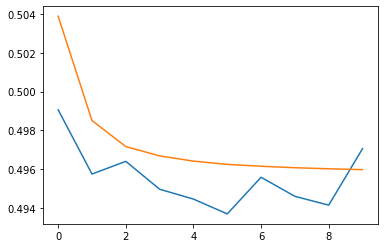

In [29]:
for i in range(2):
    plt.plot(L(learn.recorder.values).itemgot(i))

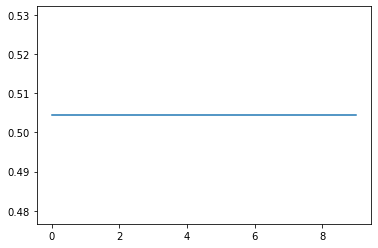

In [30]:
plt.plot(L(learn.recorder.values).itemgot(2))